In [42]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm

In [3]:
train = pd.read_json(os.path.join('E:\Datasets\MRNA','train.json') , lines = True).drop('index' , axis = 1)
test = pd.read_json(os.path.join('E:\Datasets\MRNA','test.json') , lines = True).drop('index' , axis = 1)
sub = pd.read_csv(os.path.join('E:\Datasets\MRNA','sample_submission.csv'))

In [4]:
train.head()

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [27]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
id,id_001f94081,id_0049f53ba,id_006f36f57,id_0082d463b,id_0087940f4,id_00ab2d761,id_00abef1d7,id_00b436dec,id_00fcc5cd1,id_010ab0472,...,id_fe899d33d,id_febf3bab9,id_feea15e66,id_ff103a85c,id_ff13729b0,id_ff84602f7,id_ff85fcdba,id_ffa99f541,id_ffe06f3fe,id_fff546103
sequence,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,GGAAAGCGCCGCGGCGGUAGCGGCAGCGAGGAGCGCUACCAAGGCA...,GGAAAACAAUUGCAUCGUUAGUACGACUCCACAGCGUAAGCUGUGG...,GGAAAUCAUCGAGGACGGGUCCGUUCAGCACGCGAAAGCGUCGUGA...,GGAAAGCCAUACCUAGGCGCAAGCCUAGGUAUGGCGGUGAUCUGGU...,GGAAAGCAUGGGACCACGAUUCACAUCGGUCUGCACGUAGGACAUU...,...,GGAAAAGUAGGCAACUCGAAGUACGCUCCUGGAACAGAAAAAGAGA...,GGAAAAAGAUCACAGAGGUGAUCAAGAAGUGUAUCAGAGGAUACAC...,GGAAACUCCACAUCUCUACGCCACGAAAGUGGGUAGGAUGGGAGAG...,GGAAAAGAUCGAUAGGUACGUGGGUUCAUGUAGGAAACUAGCUGGC...,GGAAAUAAAUAAAUAACAAUAAAGAGAUAAGACACAAUAAAUAAAA...,GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...,GGAAAACAAAAACAAACAACAAAAACAAACAACAAAAACAAACAAC...,GGAAAGCCAUACCUAGGCUUCGGCCUAGGUAUGGCGGUGAUCUGGU...,GGAAACGAUAGCAGAAGAGAUCGAUAUAGAGCAUAAGCUAAGAAUA...,GGAAAGCUAGGACGUGGGAGCGUAGCUCUCCACACGGGUACGCCAA...
structure,.....((((((.......)))).)).((.....((..((((((......,.....(((((((((((((((((((((((....)))))))))).)))...,.....((((.((.....((((.(((.....)))..((((......)...,......((((((((((((((((......))))))))))))))))((...,.....(((((((.((((((((((((.(((((((((....)))))))...,.....(.(((((.(((((((((...........)))))))..(((....,.........((((((((......((((((((((((....)))))))...,.....(((((((((((..(((((((((..((((....))))..)))...,.....(((((((((((((....)))))))))))))(((((((((((...,.....(((...((((..(((....))))))))))(((((((((......,...,......((((((..(((...(((((((((((...))).....)))....,.......((((((....)))))).....(((((((....)))))))...,.....((((.((((.((((.((((....)))))))))))))))).(...,......((((....(((((((((((.((..(((....)))..))))...,.................................................,........((..((......))...)).........(((..........,.................................................,.....(((((((((((((....)))))))))))))(((((((((((...,.....((((..(....)..))))......(((....)))..........,.....((((((((((((((((...)))).)))).((((((((((.....
predicted_loop_type,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,EEEEESISSSSSISSSSSSSSSHHHHHHHHHHHSSSSSSSMMSSSH...,EEEEEEEEESSSSSSSSIIIIIISSSSSSSSSSSSHHHHSSSSSSS...,EEEEESSSSSSSSSSSIISSSSSSSSSIISSSSHHHHSSSSIISSS...,EEEEESSSSSSSSSSSSSHHHHSSSSSSSSSSSSSSSSSSSSSSSS...,EEEEESSSBBBSSSSBBSSSHHHHSSSSSSSSSSSSSSSSSSSIII...,...,EEEEEESSSSSSBBSSSIIISSSSSSSSSSSHHHSSSBBBBBSSSB...,EEEEEEESSSSSSHHHHSSSSSSXXXXXSSSSSSSHHHHSSSSSSS...,EEEEESSSSBSSSSBSSSSBSSSSHHHHSSSSSSSSSSSSSSSSMS...,EEEEEESSSSIIIISSSSSSSSSSSBSSIISSSHHHHSSSIISSSS...,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,EEEEEEEESSIISSHHHHHHSSIIISSXXXXXXXXXSSSHHHHHHH...,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,EEEEESSSSSSSSSSSSSHHHHSSSSSSSSSSSSSSSSSSSSSSSS...,EEEEESSSSIISHHHHSIISSSSXXXXXXSSSHHHHSSSXXXXXXX...,EEEEESSSSSSSSSSSSSSSSHHHSSSSBSSSSMSSSSSSSSSSHH...
signal_to_noise,6.894,0.193,8.8,0.104,0.423,4.136,2.485,1.727,0.646,5.545,...,3.653,6.064,3.331,4.017,1.995,4.036,3.227,0.345,5.553,6.545
SN_filter,1,0,1,0,0,1,1,1,0,1,...,0,1,1,1,0,1,1,0,0,1
seq_length,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
seq_scored,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
reactivity_error,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[0.0931, 0.13290000000000002, 0.11280000000000...","[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[1.665, 2.1728, 2.0

In [5]:
test.head()

,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [6]:
sub.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.0,0.0,0.0,0.0,0.0
1,id_00073f8be_1,0.0,0.0,0.0,0.0,0.0
2,id_00073f8be_2,0.0,0.0,0.0,0.0,0.0
3,id_00073f8be_3,0.0,0.0,0.0,0.0,0.0
4,id_00073f8be_4,0.0,0.0,0.0,0.0,0.0


In [7]:
train.columns

Index(['id', 'sequence', 'structure', 'predicted_loop_type', 'signal_to_noise',
       'SN_filter', 'seq_length', 'seq_scored', 'reactivity_error',
       'deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C',
       'deg_error_50C', 'reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C',
       'deg_50C'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'sequence', 'structure', 'predicted_loop_type', 'seq_length',
       'seq_scored'],
      dtype='object')

In [9]:
print("Train data shape: ",train.shape)
print("Test data shape: ",test.shape)
print("Sample submission shape: ",sub.shape)

Train data shape:  (2400, 18)
Test data shape:  (3634, 6)
Sample submission shape:  (457953, 6)


## EDA

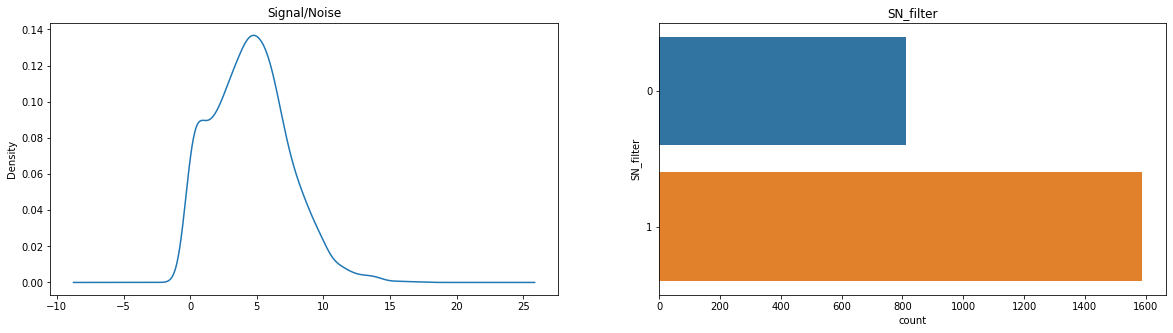

In [11]:
fig, ax = plt.subplots(1 , 2 , figsize = (20 , 5))
train['signal_to_noise'].plot.kde(ax = ax[0])
ax[0].set_title('Signal/Noise')

sns.countplot(data=train,y='SN_filter',ax=ax[1])
ax[1].set_title('SN_filter')

plt.show()

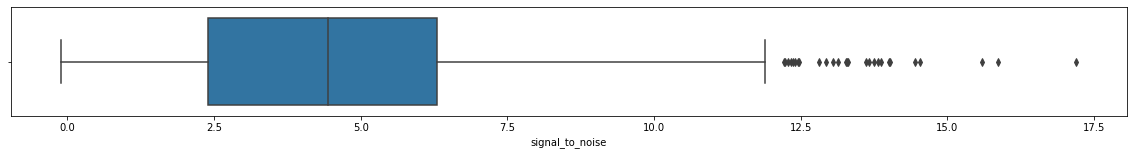

In [12]:
plt.figure(figsize = (20 , 2))
sns.boxplot(data = train , x = 'signal_to_noise')

plt.show()

In [14]:
print("Number of samples with -ev signal/noise values: " , train[train['signal_to_noise']<0].shape[0])

Q1 = np.percentile(train['signal_to_noise'] , q = 25)
Q3 = np.percentile(train['signal_to_noise'] , q = 75)
IQR = Q3 - Q1

print("Number of samples with too high signal/noise values", train[train['signal_to_noise'] > Q3 + 1.5 * IQR].shape[0])

Number of samples with -ev signal/noise values:  8
Number of samples with too high signal/noise values 27


In [16]:
train.seq_length.value_counts()

107    2400
Name: seq_length, dtype: int64

In [17]:
test.seq_length.value_counts()

130    3005
107     629
Name: seq_length, dtype: int64

#### Targets avg over position

In [20]:
avg_reactivity = np.array(list(map(np.array,train.reactivity))).mean(axis = 0)
avg_deg_50C = np.array(list(map(np.array,train.deg_50C))).mean(axis = 0)
avg_deg_pH10 = np.array(list(map(np.array,train.deg_pH10))).mean(axis = 0)
avg_deg_Mg_50C = np.array(list(map(np.array,train.deg_Mg_50C))).mean(axis = 0)
avg_deg_Mg_pH10 = np.array(list(map(np.array,train.deg_Mg_pH10))).mean(axis = 0)

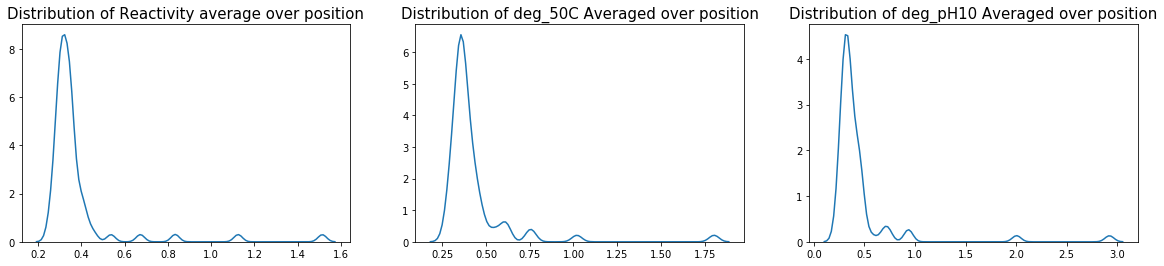

In [21]:
fig , ax = plt.subplots(1 , 3 , figsize = (20 , 4))

sns.kdeplot(avg_reactivity , ax = ax[0])
ax[0].set_title("Distribution of Reactivity average over position" , size = 15)

# Distribution of deg_50C Averaged over position
sns.kdeplot(avg_deg_50C , ax = ax[1])
ax[1].set_title('Distribution of deg_50C Averaged over position', size = 15)

# Distribution of deg_pH10 Averaged over position
sns.kdeplot(avg_deg_pH10 , ax = ax[2])
ax[2].set_title('Distribution of deg_pH10 Averaged over position' , size = 15)


plt.show()

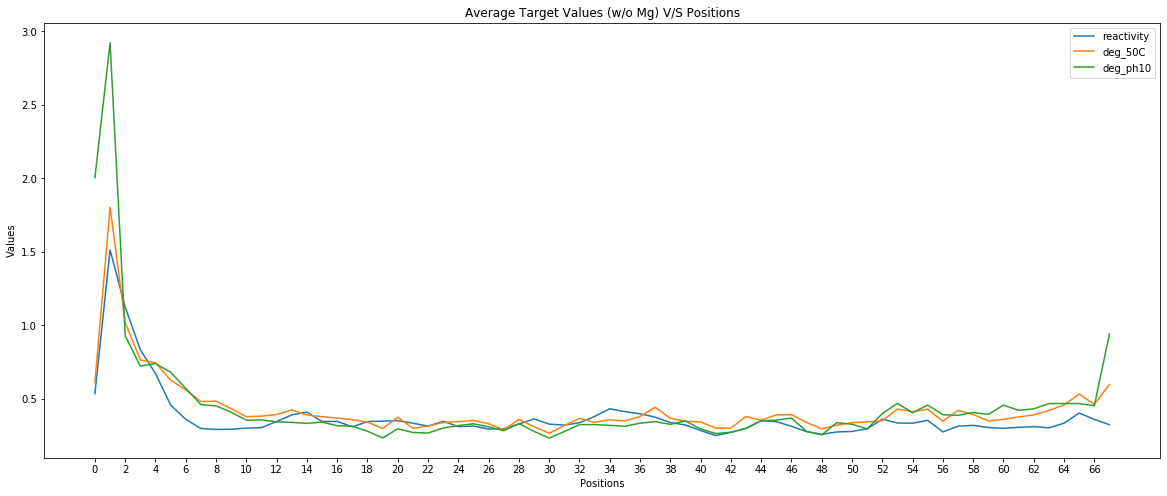

In [22]:
plt.figure(figsize = (20 , 8))

sns.lineplot(x = range(68) , y = avg_reactivity , label = 'reactivity')
sns.lineplot(x = range(68) , y = avg_deg_50C , label = 'deg_50C')
sns.lineplot(x = range(68) , y = avg_deg_pH10 , label = 'deg_ph10')

plt.xlabel('Positions')
plt.xticks(range(0 , 68 , 2))
plt.ylabel('Values')
plt.title('Average Target Values (w/o Mg) V/S Positions')

plt.show()

We can see high values of Degradation & Reactivity at the beginning of the sequence
There is high degradation because of pH10 at the beginning but no such pattern for rest of the positions.
We can see some correlation between deg_50C & deg_pH10

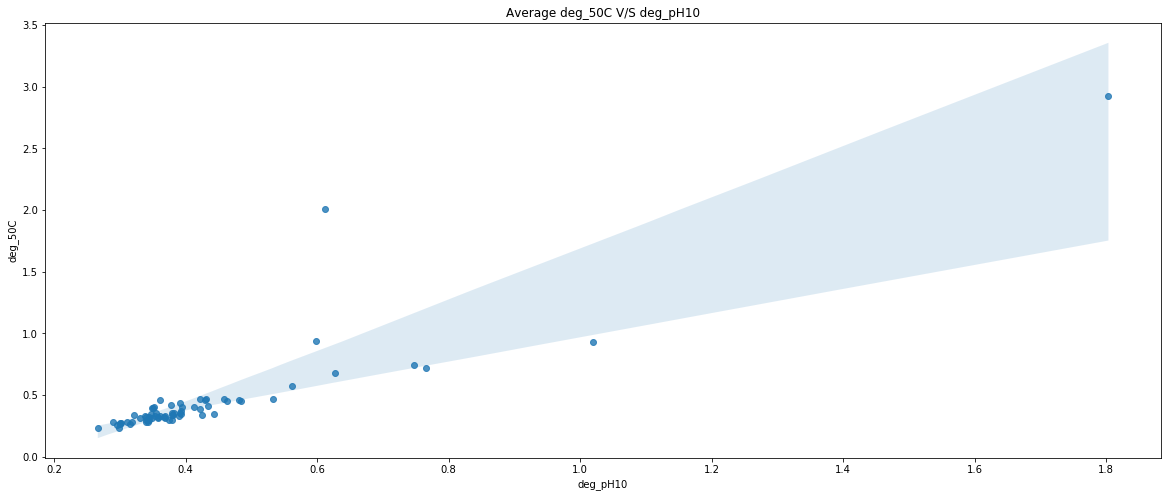

In [23]:
plt.figure(figsize = (20 , 8))
sns.regplot(x = avg_deg_50C , y = avg_deg_pH10)

plt.title('Average deg_50C V/S deg_pH10')
plt.ylabel('deg_50C')
plt.xlabel('deg_pH10')

plt.show()

In [28]:
print("Correlation Coeff between avg_deg_50C & avg_deg_pH10: ",np.corrcoef(avg_deg_50C,avg_deg_pH10)[0][1])

Correlation Coeff between avg_deg_50C & avg_deg_pH10:  0.8841301466799286


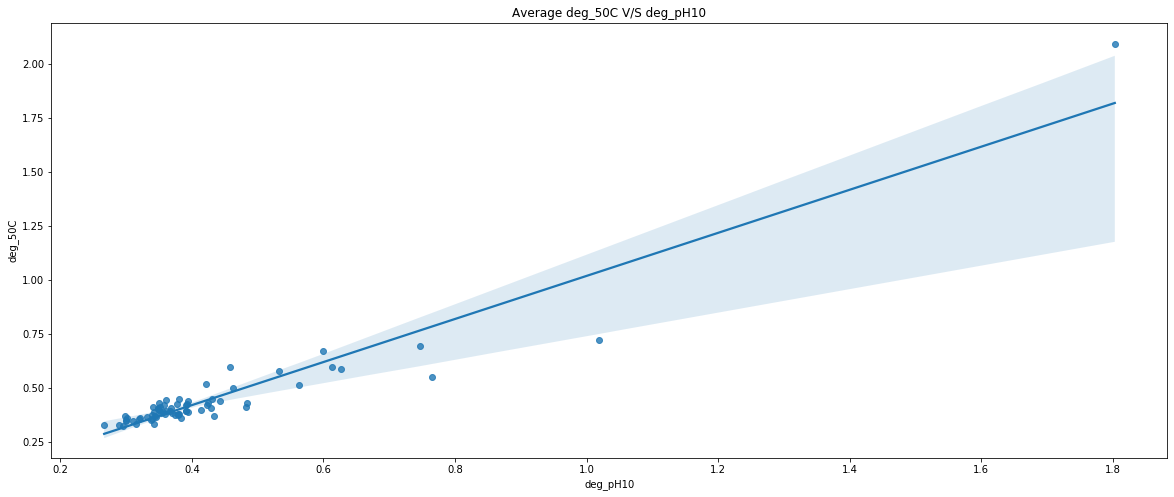

In [24]:
plt.figure(figsize = (20 , 8))
sns.regplot(x = avg_deg_50C , y = avg_deg_Mg_pH10)

plt.title('Average deg_50C V/S deg_pH10')
plt.ylabel('deg_50C')
plt.xlabel('deg_pH10')

plt.show()

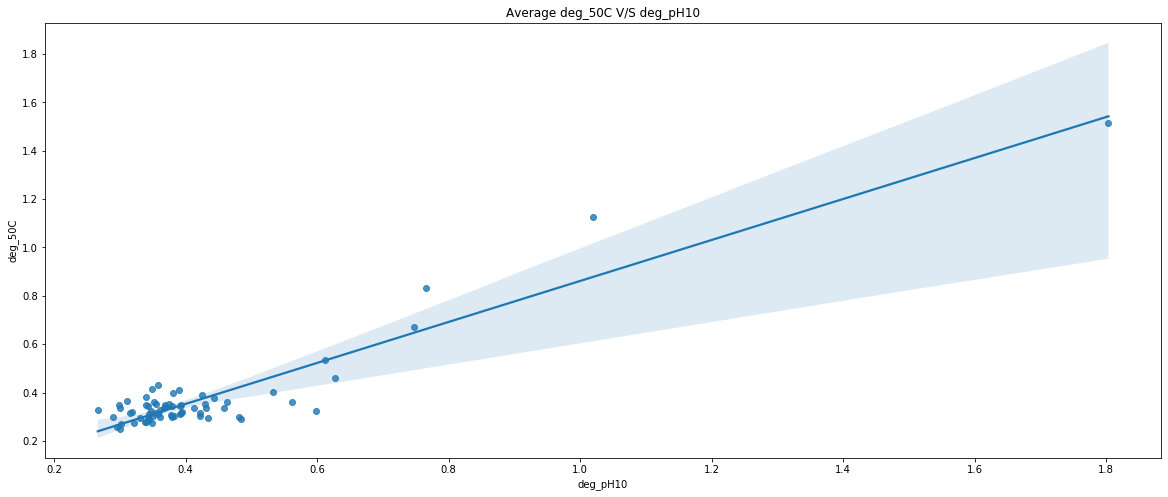

In [25]:
plt.figure(figsize = (20 , 8))
sns.regplot(x = avg_deg_50C , y = avg_reactivity)

plt.title('Average deg_50C V/S deg_pH10')
plt.ylabel('deg_50C')
plt.xlabel('deg_pH10')

plt.show()

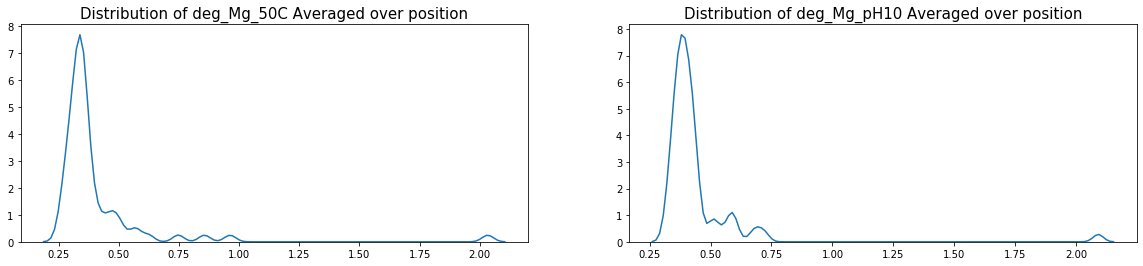

In [30]:
fig, ax = plt.subplots(1 , 2 , figsize = (20 , 4))

# Distribution of deg_50C Averaged over position
sns.kdeplot(avg_deg_Mg_50C , ax = ax[0])
ax[0].set_title('Distribution of deg_Mg_50C Averaged over position' , size = 15)


# Distribution of deg_pH10 Averaged over position
sns.kdeplot(avg_deg_Mg_pH10 , ax = ax[1])
ax[1].set_title('Distribution of deg_Mg_pH10 Averaged over position' , size = 15)

plt.show()

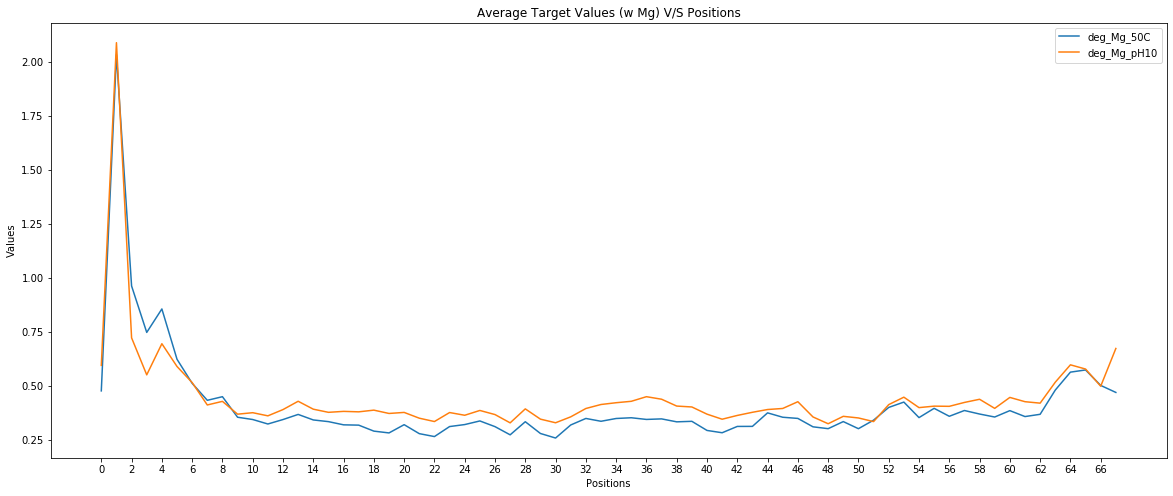

In [32]:
plt.figure(figsize = (20 , 8))

sns.lineplot(x = range(68) , y = avg_deg_Mg_50C , label = 'deg_Mg_50C')
sns.lineplot(x = range(68) , y = avg_deg_Mg_pH10 , label = 'deg_Mg_pH10')

plt.xlabel('Positions')
plt.xticks(range(0 , 68 , 2))
plt.ylabel('Values')
plt.title('Average Target Values (w Mg) V/S Positions')

plt.show()

Most of the time deg_Mg_pH10 is more than deg_Mg_50C
And we can see some correlation between them

In [34]:
print("Correlation Coeff between avg_deg_Mg_50C & avg_deg_Mg_pH10: ",np.corrcoef(avg_deg_Mg_50C,avg_deg_Mg_pH10)[0][1])

Correlation Coeff between avg_deg_Mg_50C & avg_deg_Mg_pH10:  0.9651712822435524


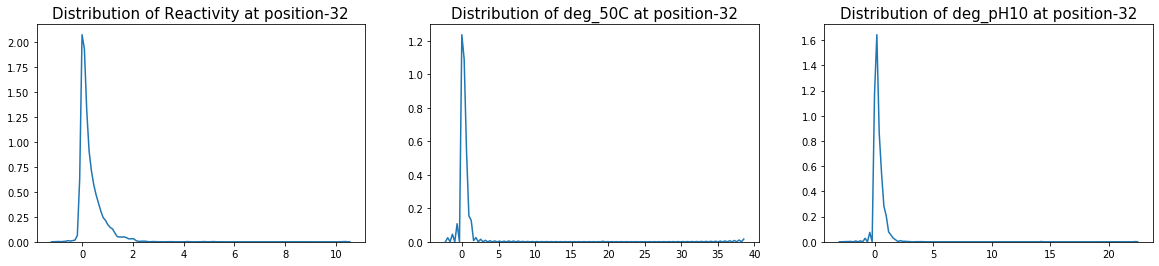

In [35]:
pos = np.random.choice(68)

fig, ax = plt.subplots(1,3,figsize=(20,4))

# Distribution of Reactivity at Random position
sns.kdeplot(np.array(list(map(np.array,train.reactivity)))[:,pos],ax=ax[0])
ax[0].set_title(f'Distribution of Reactivity at position-{pos}',size=15)

# Distribution of deg_50C at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_50C)))[:,pos],ax=ax[1])
ax[1].set_title(f'Distribution of deg_50C at position-{pos}',size=15)

# Distribution of deg_pH10 at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_pH10)))[:,pos],ax=ax[2])
ax[2].set_title(f'Distribution of deg_pH10 at position-{pos}',size=15)

plt.show()

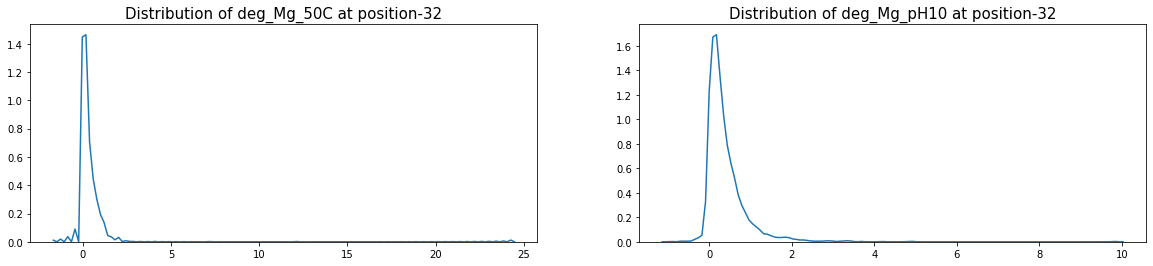

In [36]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

# Distribution of deg_50C at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_Mg_50C)))[:,pos],ax=ax[0])
ax[0].set_title(f'Distribution of deg_Mg_50C at position-{pos}',size=15)


# Distribution of deg_pH10 at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_Mg_pH10)))[:,pos],ax=ax[1])
ax[1].set_title(f'Distribution of deg_Mg_pH10 at position-{pos}',size=15)

plt.show()

#### Errors in calculation

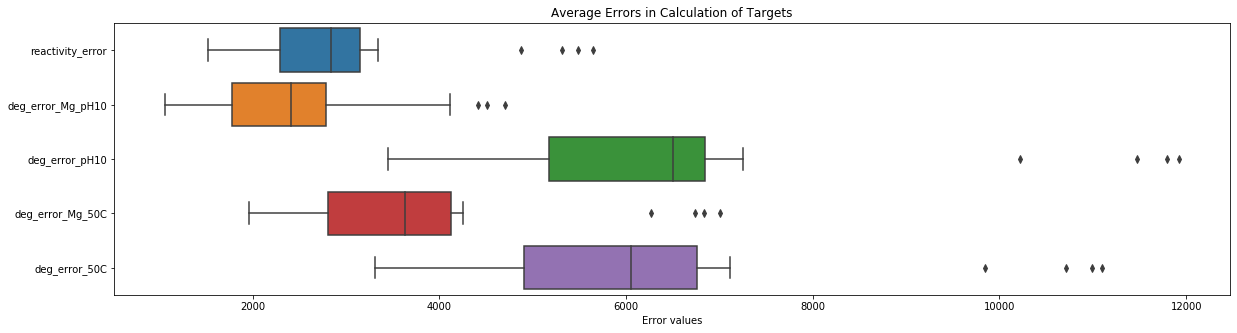

In [37]:
y = ['reactivity_error' , 'deg_error_Mg_pH10' , 'deg_error_pH10' , 'deg_error_Mg_50C' ,'deg_error_50C']
x = [np.array(list(map(np.array,train[col]))).mean(axis = 0) for col in y]

plt.figure(figsize = (20 , 5))

sns.boxplot(y = y , x = x)

plt.xlabel('Error values')
plt.title('Average Errors in Calculation of Targets')

plt.show()

Very high values of Errors in deg_error_pH10 & deg_error_50C but maybe we should not worry about these targets because evaluation is not based on these targets
Maybe this could be a reason why our models will not be scored on these two targets

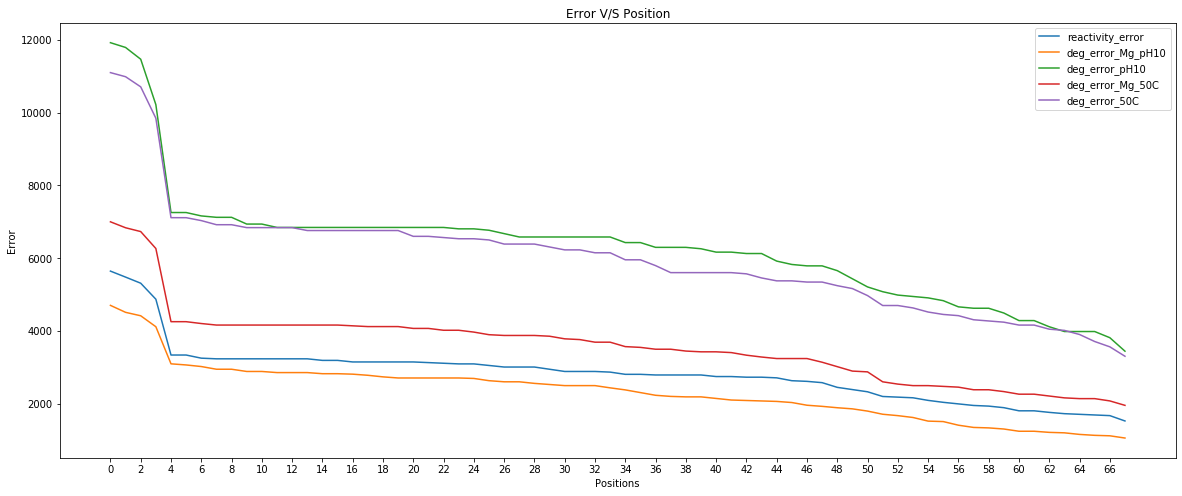

In [38]:
plt.figure(figsize = (20 , 8))

for i in range(len(y)):
    sns.lineplot(x = range(68) , y = x[i] , label = y[i])
    
plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Error')
plt.title('Error V/S Position')

plt.show()

We can see an interesting pattern here. We have high values of errors between postions 0 and 4, but then it starts decreasing constantly as we go ahead
Now let's analyse if all samples are contributing to these high values or there are only few smaples which are driving these values

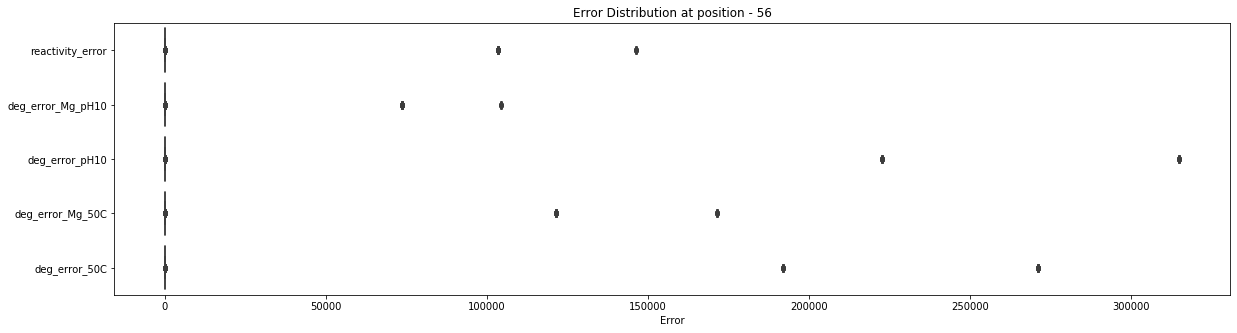

In [39]:
pos = np.random.choice(68)

y = ['reactivity_error','deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C','deg_error_50C']
x = [np.array(list(map(np.array , train[col])))[:,pos] for col in y]

plt.figure(figsize = (20 , 5))
plt.title(f'Error Distribution at position - {pos}')
plt.xlabel('Error')

sns.boxplot(y=y,x=x)

plt.show()

We can see there are few samples which are having high values of errors
Now let's try to filter these samples
We can try using SN_filter for this

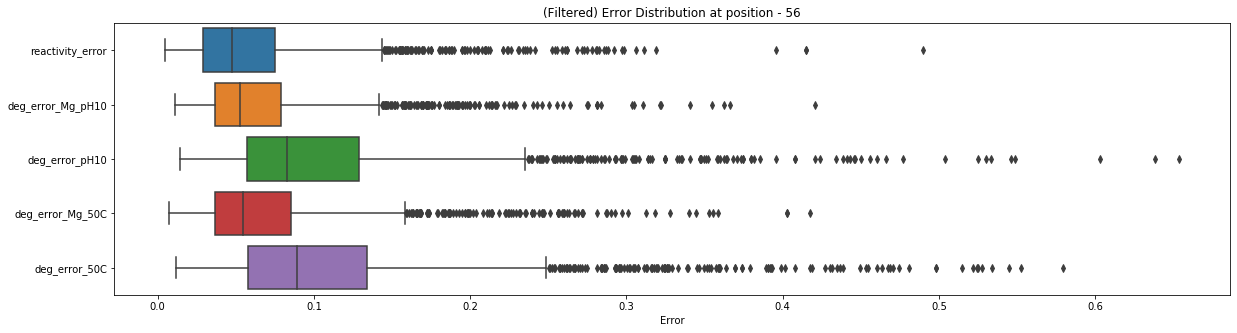

In [40]:
y = ['reactivity_error','deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C','deg_error_50C']
x = [np.array(list(map(np.array,train[train.SN_filter == 1][col])))[:,pos] for col in y]

plt.figure(figsize = (20 , 5))
plt.title(f'(Filtered) Error Distribution at position - {pos}')
plt.xlabel('Error')

sns.boxplot(y = y , x = x)

plt.show()

In [43]:
def plot_sample(sample):
    
    struct = sample['structure']
    seq = sample['sequence']
    bg = fgb.BulgeGraph.from_fasta_text(f'>rna1\n{struct}\n{seq}')[0]
    
    plt.figure(figsize=(20,8))
    fvm.plot_rna(bg)
    plt.title(f"RNA Structure (id: {sample.id})")
    plt.show()

In [46]:
sample = train.iloc[np.random.choice(train.shape[0])]
#plot_sample(sample)
print("Predicted Loop type: ",sample['predicted_loop_type'])

Predicted Loop type:  EEEEEEESSSSSMMMMMSSSSSSHHHHSSSSSSMMMMMSSSSSSSHHHHSSSSSSSMMMMMSSSSSXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE


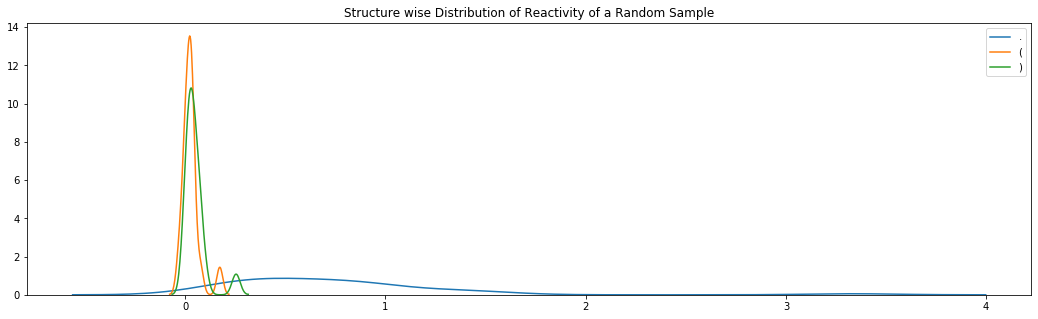

In [48]:
from collections import defaultdict

reactivity = defaultdict(lambda: [])
deg_Mg_50C = defaultdict(lambda: [])
deg_Mg_pH10 = defaultdict(lambda: [])

for i in range(len(sample['reactivity'])):
    reactivity[sample['structure'][i]].append(float(sample['reactivity'][i]))
    deg_Mg_50C[sample['structure'][i]].append(float(sample['deg_Mg_50C'][i]))
    deg_Mg_pH10[sample['structure'][i]].append(float(sample['deg_Mg_pH10'][i]))

plt.figure(figsize = (18 , 5))
for key in reactivity.keys():
    sns.kdeplot(data=reactivity[key],label=key)

plt.title('Structure wise Distribution of Reactivity of a Random Sample')
plt.show()

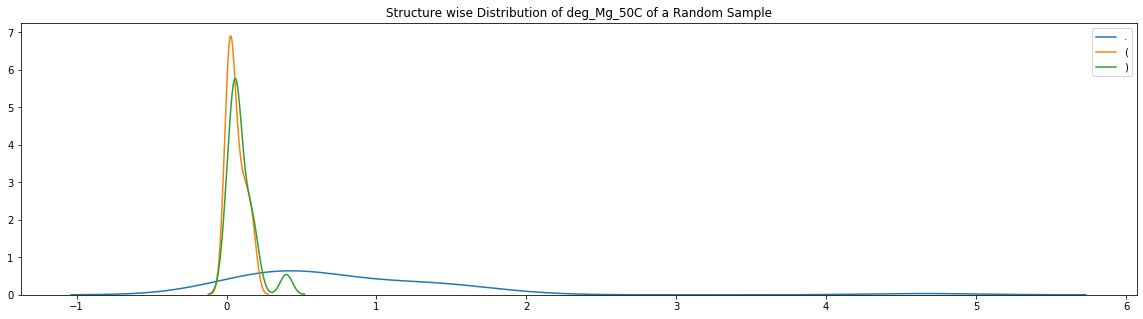

In [50]:
plt.figure(figsize = (20 , 5))
for key in reactivity.keys():
    sns.kdeplot(data = deg_Mg_50C[key] , label = key)

plt.title('Structure wise Distribution of deg_Mg_50C of a Random Sample')
plt.show()

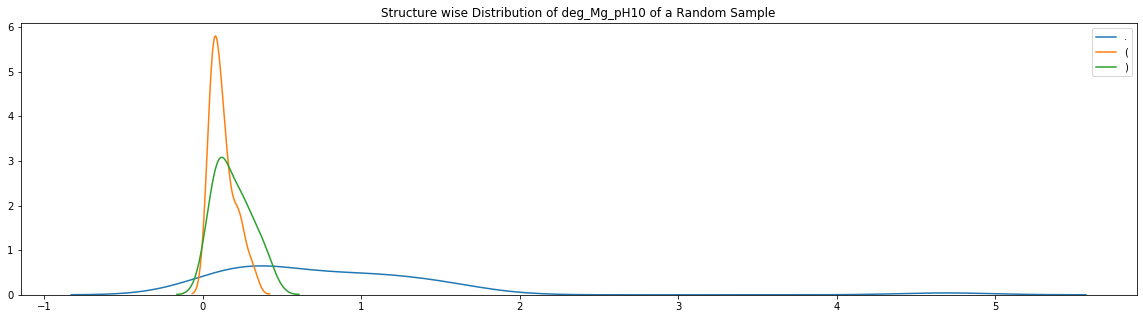

In [51]:
plt.figure(figsize = (20 , 5))
for key in reactivity.keys():
    sns.kdeplot(data = deg_Mg_pH10[key] , label = key)

plt.title('Structure wise Distribution of deg_Mg_pH10 of a Random Sample')
plt.show()

#### Pairwise exploration and degradation

In [52]:
reactivityDict = defaultdict(lambda: [])

for index in range(train.shape[0]):
    
    sample = train.iloc[index]

    structure = sample['structure']
    sequence = sample['sequence']
    reactivity = sample['reactivity']

    q = []

    for i,s in enumerate(structure[:len(reactivity)]):
        if s=='.':
            reactivityDict[sequence[i]].append(reactivity[i])
        elif s=='(':
            q.append(i)
        elif s==')':
            j = q.pop(0)
            key = "-".join(sorted([sequence[i],sequence[j]]))
            reactivityDict[key].append(reactivity[i])
            reactivityDict[key].append(reactivity[j])

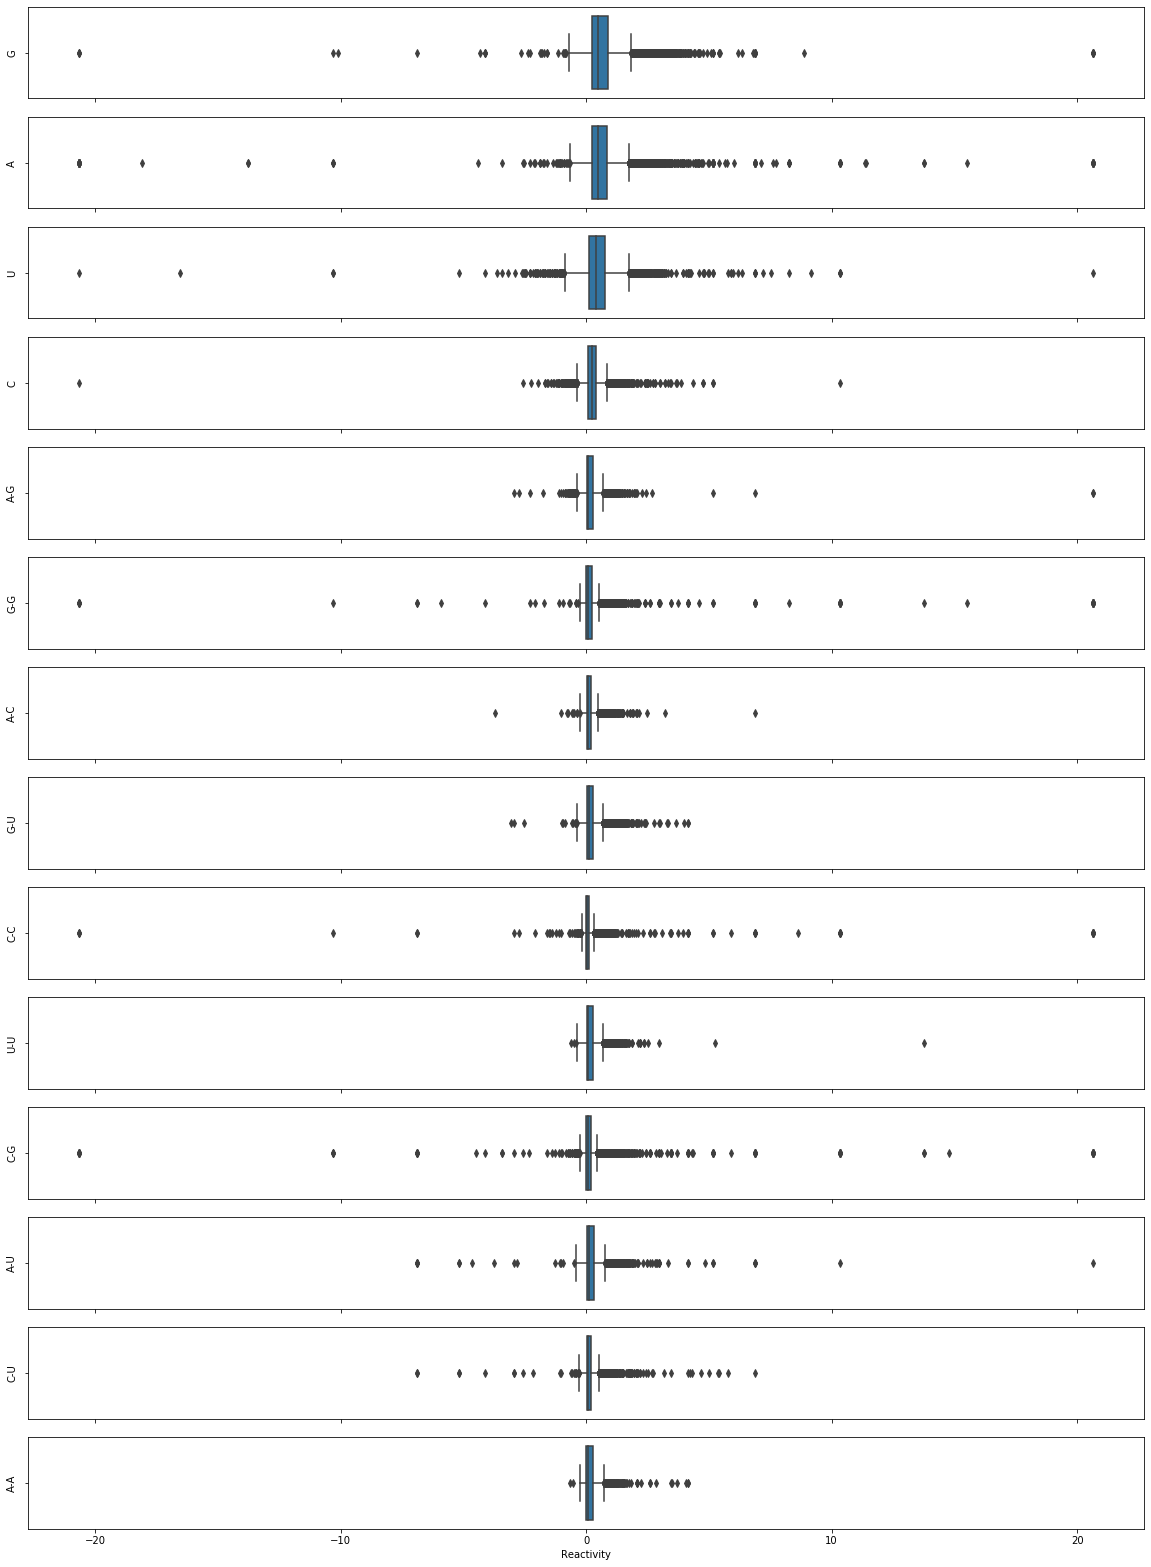

In [53]:
fig, ax = plt.subplots(len(reactivityDict.keys()) , 1 , figsize = (20 , 2 * len(reactivityDict.keys())) , sharex = True)

for i, key in enumerate(reactivityDict.keys()):
    sns.boxplot(x=reactivityDict[key],ax=ax[i])
    ax[i].set_ylabel(key)

plt.xlabel('Reactivity')
plt.show()